<h1 style="color:navy; text-align:center;">Uncovering Cancer Trends in England: A Decade of NHS Insights</h1>


## 📖 Introduction

Cancer remains one of the most significant health challenges in England, affecting thousands of individuals each year. The NHS collects comprehensive data on cancer diagnoses, which provides valuable insights into patterns and trends across the population. This project analyzes NHS cancer statistics from 2013 to 2022, with a focus on factors such as cancer type, stage at diagnosis, gender, and the distribution of cases among different population groups. By examining these patterns, the project aims to understand how cancer incidence varies across the population and how it has evolved over the past decade. While the primary goal is to gain a deeper understanding of cancer trends, the insights generated could also help inform NHS strategies related to early detection, prevention, and improving patient outcomes. Through this analysis, the project seeks to uncover important trends, highlight areas of concern, and provide a data-driven perspective on how cancer impacts various segments of the population.

## 🎯 Aim 

To analyze NHS cancer statistics from 2013 to 2022 in order to understand the distribution and trends of cancer incidence across different population groups, considering factors such as cancer type, stage at diagnosis, and gender, and to generate insights that could support a better understanding of how cancer affects the population.

## 🏥 Objective

1. To explore and describe trends in cancer incidence over the past decade.

2. To examine the distribution of different cancer types among various population groups.

3. To analyze differences in cancer incidence between genders.

4. To identify population groups that may be disproportionately affected by cancer.

5. To provide visualizations and data-driven insights that help understand the overall cancer landscape in England.

## 💡Data Snapshot: Overview of the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Project\NHS_CancerData.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5416\3578574885.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Project\NHS_CancerData.csv")


In [3]:
df.head()

,diagnosisyear,geography_type,geography_code,geography_name,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,hormone_receptor,hormone_receptor_status,gender,age_at_diagnosis,count,Population,type_of_rate,rate,lower_confidence_interval,upper_confidence_interval,flag
0,2013,Country,E92000001,England,Anus,All Anus,All stages,All quintiles,NaN,NaN,Persons,All ages,1057,53918686,Age-standardised,2.1,2.0,2.3,NaN
1,2013,Country,E92000001,England,Anus,All Anus,All stages,All quintiles,NaN,NaN,Females,All ages,668,27410034,Age-standardised,2.6,2.4,2.8,NaN
2,2013,Country,E92000001,England,Anus,All Anus,All stages,All quintiles,NaN,NaN,Males,All ages,389,26508652,Age-standardised,1.7,1.5,1.9,NaN
3,2013,Country,E92000001,England,Anus,All Anus,All stages,1 - most deprived,NaN,NaN,Persons,All ages,232,10887630,Age-standardised,2.8,2.5,3.2,NaN
4,2013,Country,E92000001,England,Anus,All Anus,All stages,2,NaN,NaN,Persons,All ages,219,10952016,Age-standardised,2.5,2.2,2.8,NaN


*✅ The first few rows show cancer diagnosis records, including details on year, geography, cancer type, stage, demographics, and statistical indicators such as counts and rates.*

In [4]:
df.shape

(35030, 19)

✅ *The dataset comprises 35,030 rows and 19 columns.*

In [5]:
df.columns

Index(['diagnosisyear', 'geography_type', 'geography_code', 'geography_name',
       'ndrs_main_group', 'ndrs_detailed_group', 'stage_at_diagnosis',
       'imd_quintile', 'hormone_receptor', 'hormone_receptor_status', 'gender',
       'age_at_diagnosis', 'count', 'Population', 'type_of_rate', 'rate',
       'lower_confidence_interval', 'upper_confidence_interval', 'flag'],
      dtype='object')

✅ *The dataset includes variables capturing diagnosis year, geography, cancer type, stage, demographics, incidence counts, population, and rate estimates.*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35030 entries, 0 to 35029
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   diagnosisyear              35030 non-null  int64  
 1   geography_type             35030 non-null  object 
 2   geography_code             35030 non-null  object 
 3   geography_name             35030 non-null  object 
 4   ndrs_main_group            35030 non-null  object 
 5   ndrs_detailed_group        35030 non-null  object 
 6   stage_at_diagnosis         35030 non-null  object 
 7   imd_quintile               35030 non-null  object 
 8   hormone_receptor           690 non-null    object 
 9   hormone_receptor_status    690 non-null    object 
 10  gender                     35030 non-null  object 
 11  age_at_diagnosis           35030 non-null  object 
 12  count                      35030 non-null  int64  
 13  Population                 35030 non-null  int

✅ *The dataset contains 35,030 rows and 19 columns. Out of these, 13 are categorical, 3 are integers (diagnosisyear, count, Population), and 3 are decimals (rate, lower_confidence_interval, upper_confidence_interval).*

*Some fields are quite sparse:*

*1)The hormone receptor fields are missing for almost the entire dataset (around 98% missing).*

*2)The flag column is missing in nearly 80% of rows.*

*The age_at_diagnosis column is stored as text, suggesting it may represent age bands rather than exact ages.*


In [7]:
df.describe()

,diagnosisyear,count,Population,rate,lower_confidence_interval,upper_confidence_interval
count,35030.000000,35030.000000,3.503000e+04,29792.000000,29792.000000,29792.000000
mean,2017.500000,1497.867713,2.124806e+07,12.719364,12.260382,13.210795
std,2.872322,6697.796599,1.757073e+07,43.901143,43.332517,44.474403
min,2013.000000,0.000000,5.201813e+06,0.000000,0.000000,0.000000
25%,2015.000000,32.000000,5.650682e+06,0.500000,0.400000,0.700000
50%,2017.500000,166.000000,1.137309e+07,1.900000,1.700000,2.200000
75%,2020.000000,740.000000,2.830780e+07,7.700000,7.100000,8.300000
max,2022.000000,230968.000000,5.711254e+07,673.600000,666.700000,680.500000


✅*The dataset covers cancer diagnoses from 2013 to 2022.*

*Case counts range from 0 to 230,968, with most records showing relatively small numbers.*

*Population figures span from about 5 million to 57 million, with a middle value around 11 million.*

*The rate column shows how common cancer is in the population (cases per 100,000). Most rates are low, with a median of about 1.9, but a few records have much higher rates, reaching up to 673.6.*

*The confidence interval columns show the likely range for the rate. Most values fall between 0.4 and 8.3, though a few extreme records have much higher ranges, above 600.*

## 🧹Data Pre-processing and Cleaning

In [8]:
df.isnull()

,diagnosisyear,geography_type,geography_code,geography_name,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,hormone_receptor,hormone_receptor_status,gender,age_at_diagnosis,count,Population,type_of_rate,rate,lower_confidence_interval,upper_confidence_interval,flag
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35025,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
35026,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
35027,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
35028,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True


In [9]:
df.isnull().sum()

diagnosisyear                    0
geography_type                   0
geography_code                   0
geography_name                   0
ndrs_main_group                  0
ndrs_detailed_group              0
stage_at_diagnosis               0
imd_quintile                     0
hormone_receptor             34340
hormone_receptor_status      34340
gender                           0
age_at_diagnosis                 0
count                            0
Population                       0
type_of_rate                     0
rate                          5238
lower_confidence_interval     5238
upper_confidence_interval     5238
flag                         27835
dtype: int64

In [10]:
df[df.isnull().any(axis=1)].head()

,diagnosisyear,geography_type,geography_code,geography_name,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,hormone_receptor,hormone_receptor_status,gender,age_at_diagnosis,count,Population,type_of_rate,rate,lower_confidence_interval,upper_confidence_interval,flag
0,2013,Country,E92000001,England,Anus,All Anus,All stages,All quintiles,NaN,NaN,Persons,All ages,1057,53918686,Age-standardised,2.1,2.0,2.3,NaN
1,2013,Country,E92000001,England,Anus,All Anus,All stages,All quintiles,NaN,NaN,Females,All ages,668,27410034,Age-standardised,2.6,2.4,2.8,NaN
2,2013,Country,E92000001,England,Anus,All Anus,All stages,All quintiles,NaN,NaN,Males,All ages,389,26508652,Age-standardised,1.7,1.5,1.9,NaN
3,2013,Country,E92000001,England,Anus,All Anus,All stages,1 - most deprived,NaN,NaN,Persons,All ages,232,10887630,Age-standardised,2.8,2.5,3.2,NaN
4,2013,Country,E92000001,England,Anus,All Anus,All stages,2,NaN,NaN,Persons,All ages,219,10952016,Age-standardised,2.5,2.2,2.8,NaN


In [11]:
df[df['hormone_receptor'].notna()]['ndrs_main_group'].value_counts()

ndrs_main_group
Breast    690
Name: count, dtype: int64

✅*The hormone receptor and hormone receptor status columns are relevant only for breast cancer. For all other cancers, these fields appear as ‘NaN’, which is expected and not an error. Therefore, the columns are kept as they are.*

In [12]:
df[['rate', 'lower_confidence_interval',	'upper_confidence_interval']].isna().sum()

rate                         5238
lower_confidence_interval    5238
upper_confidence_interval    5238
dtype: int64

In [13]:
df[df['rate'].isna()]['ndrs_main_group'].value_counts()

ndrs_main_group
Blood cancer                                         914
Soft tissue sarcoma                                  617
Cancer of unknown primary                            510
Head and neck                                        491
Brain                                                419
Bone sarcoma                                         390
Kidney                                               344
Oesophagus                                           267
Renal pelvis and ureter                              250
Stomach                                              154
Heart, mediastinum, pleura, other and ill-defined    116
Bladder                                               92
Pancreas                                              90
Bowel                                                 86
Ovary                                                 80
Urethra                                               61
Liver and biliary tract                               60
Breast         

In [14]:
df[df['rate'].isna()].head()

,diagnosisyear,geography_type,geography_code,geography_name,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,hormone_receptor,hormone_receptor_status,gender,age_at_diagnosis,count,Population,type_of_rate,rate,lower_confidence_interval,upper_confidence_interval,flag
29,2013,Country,E92000001,England,Anus,All Anus,Unstageable,All quintiles,NaN,NaN,Males,All ages,8,26508652,Age-standardised,NaN,NaN,NaN,[note2]
108,2013,Country,E92000001,England,Bladder,Bladder - uncertain or unknown,Missing,All quintiles,NaN,NaN,Persons,All ages,0,53918686,Age-standardised,NaN,NaN,NaN,[note2]
109,2013,Country,E92000001,England,Bladder,Bladder - uncertain or unknown,Stage 1 & 2,All quintiles,NaN,NaN,Persons,All ages,0,53918686,Age-standardised,NaN,NaN,NaN,[note2]
110,2013,Country,E92000001,England,Bladder,Bladder - uncertain or unknown,Stage 3 & 4,All quintiles,NaN,NaN,Persons,All ages,0,53918686,Age-standardised,NaN,NaN,NaN,[note2]
112,2013,Country,E92000001,England,Bladder,Bladder - uncertain or unknown,Missing,All quintiles,NaN,NaN,Females,All ages,0,27410034,Age-standardised,NaN,NaN,NaN,[note2]


In [15]:
df[df['rate'].isna()][['count', 'rate', 'lower_confidence_interval', 'upper_confidence_interval']]

,count,rate,lower_confidence_interval,upper_confidence_interval
29,8,NaN,NaN,NaN
108,0,NaN,NaN,NaN
109,0,NaN,NaN,NaN
110,0,NaN,NaN,NaN
112,0,NaN,NaN,NaN
...,...,...,...,...
34928,6,NaN,NaN,NaN
34929,11,NaN,NaN,NaN
34930,12,NaN,NaN,NaN
34942,10,NaN,NaN,NaN


In [16]:
df[df['rate'].isna()][['diagnosisyear', 'ndrs_main_group', 'count','rate', 'lower_confidence_interval', 'upper_confidence_interval']].head()


,diagnosisyear,ndrs_main_group,count,rate,lower_confidence_interval,upper_confidence_interval
29,2013,Anus,8,NaN,NaN,NaN
108,2013,Bladder,0,NaN,NaN,NaN
109,2013,Bladder,0,NaN,NaN,NaN
110,2013,Bladder,0,NaN,NaN,NaN
112,2013,Bladder,0,NaN,NaN,NaN


✅ The columns rate, lower_confidence_interval, and upper_confidence_interval are sometimes empty. This happens when the number of cases (count) is extremely small (often zero or single digits). In such situations, calculating a rate per 100,000 people would not be meaningful, so these fields are left blank. These missing values are therefore expected and should not be treated as errors.

In [17]:
flags = ['[note1]', '[note2]', '[note4]', '[u]']
flagged_rows = df[df['flag'].isin(flags)]
print(flagged_rows)

       diagnosisyear geography_type geography_code geography_name  \
25              2013        Country      E92000001        England   
29              2013        Country      E92000001        England   
98              2013        Country      E92000001        England   
99              2013        Country      E92000001        England   
102             2013        Country      E92000001        England   
...              ...            ...            ...            ...   
34932           2022        Country      E92000001        England   
34943           2022        Country      E92000001        England   
34944           2022        Country      E92000001        England   
35025           2022        Country      E92000001        England   
35029           2022        Country      E92000001        England   

      ndrs_main_group             ndrs_detailed_group stage_at_diagnosis  \
25               Anus                        All Anus        Unstageable   
29               An

In [18]:
df_clean = df.copy()

In [19]:
df_clean = df_clean.drop(columns = ['lower_confidence_interval', 'upper_confidence_interval','flag' ])

In [20]:
df_clean.columns

Index(['diagnosisyear', 'geography_type', 'geography_code', 'geography_name',
       'ndrs_main_group', 'ndrs_detailed_group', 'stage_at_diagnosis',
       'imd_quintile', 'hormone_receptor', 'hormone_receptor_status', 'gender',
       'age_at_diagnosis', 'count', 'Population', 'type_of_rate', 'rate'],
      dtype='object')

✅ The columns Lower Confidence Interval, Upper Confidence Interval, and Flag were dropped. These fields are valid but mainly indicate statistical uncertainty for small case numbers. Since the project focuses on broader cancer trends, they are not needed for this analysis.

In [21]:
df_clean.duplicated().sum()

0

In [22]:
df_clean.dtypes

diagnosisyear                int64
geography_type              object
geography_code              object
geography_name              object
ndrs_main_group             object
ndrs_detailed_group         object
stage_at_diagnosis          object
imd_quintile                object
hormone_receptor            object
hormone_receptor_status     object
gender                      object
age_at_diagnosis            object
count                        int64
Population                   int64
type_of_rate                object
rate                       float64
dtype: object

In [23]:
df_clean['age_at_diagnosis']

0        All ages
1        All ages
2        All ages
3        All ages
4        All ages
           ...   
35025    All ages
35026    All ages
35027    All ages
35028    All ages
35029    All ages
Name: age_at_diagnosis, Length: 35030, dtype: object

In [24]:
df_clean = df_clean.drop(columns=['age_at_diagnosis'])

In [25]:
df_clean[['geography_type', 'geography_code', 'geography_name', 'type_of_rate']]

,geography_type,geography_code,geography_name,type_of_rate
0,Country,E92000001,England,Age-standardised
1,Country,E92000001,England,Age-standardised
2,Country,E92000001,England,Age-standardised
3,Country,E92000001,England,Age-standardised
4,Country,E92000001,England,Age-standardised
...,...,...,...,...
35025,Country,E92000001,England,Age-standardised
35026,Country,E92000001,England,Age-standardised
35027,Country,E92000001,England,Age-standardised
35028,Country,E92000001,England,Age-standardised


In [26]:
print(df['geography_type'].nunique())
print(df['geography_code'].nunique())
print(df['geography_name'].nunique())
print(df['type_of_rate'].nunique())

1
1
1
1


In [27]:
df_clean = df_clean.drop(columns=['geography_type', 'geography_code', 'geography_name', 'type_of_rate'])

✅The columns geography_type, geography_code, geography_name, age_at_diagnosis, and type_of_rate were constant across all rows (e.g., always "England", "Age-standardised"). Since they did not provide variation or add analytical value, they were removed. These details are still important as dataset context, but they do not affect the analysis.

In [28]:
df_clean.columns

Index(['diagnosisyear', 'ndrs_main_group', 'ndrs_detailed_group',
       'stage_at_diagnosis', 'imd_quintile', 'hormone_receptor',
       'hormone_receptor_status', 'gender', 'count', 'Population', 'rate'],
      dtype='object')

In [29]:
df_clean = df_clean[df_clean['ndrs_detailed_group'].str.startswith("All ")]

In [30]:
df_clean.head()

,diagnosisyear,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,hormone_receptor,hormone_receptor_status,gender,count,Population,rate
0,2013,Anus,All Anus,All stages,All quintiles,NaN,NaN,Persons,1057,53918686,2.1
1,2013,Anus,All Anus,All stages,All quintiles,NaN,NaN,Females,668,27410034,2.6
2,2013,Anus,All Anus,All stages,All quintiles,NaN,NaN,Males,389,26508652,1.7
3,2013,Anus,All Anus,All stages,1 - most deprived,NaN,NaN,Persons,232,10887630,2.8
4,2013,Anus,All Anus,All stages,2,NaN,NaN,Persons,219,10952016,2.5


## Pivot Tables

In [31]:
df_imd = df_clean[df_clean['imd_quintile'].isin(['1 - most deprived', '2', '3', '4', '5 - least deprived'])].copy()

df_imd_summary = df_imd.pivot_table(
    index=['diagnosisyear', 'ndrs_main_group', 'ndrs_detailed_group', 'stage_at_diagnosis', 'imd_quintile'],
    columns='gender',
    values='count',
    aggfunc='sum', 
    fill_value=0).reset_index()

df_imd_summary = df_imd_summary.rename(columns={
    'Males': 'Male_count',
    'Females': 'Female_count',
    'Persons': 'Persons_count'})

In [32]:
df_imd_summary.head()

gender,diagnosisyear,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,Female_count,Male_count,Persons_count
0,2013,Anus,All Anus,All stages,1 - most deprived,150,82,232
1,2013,Anus,All Anus,All stages,2,135,84,219
2,2013,Anus,All Anus,All stages,3,141,69,210
3,2013,Anus,All Anus,All stages,4,113,73,186
4,2013,Anus,All Anus,All stages,5 - least deprived,129,81,210


✅ The dataset was cleaned by removing totals (like “All quintiles”) to avoid double-counting.

✅ In the dataset, the count column is split across rows by gender (Males, Females, Persons). This makes it difficult to compare values directly. To make the data easier to analyze, a pivot table is created. 

✅ The gender values (Males, Females, Persons) are spread into separate columns.
    
✅ The count values are placed under these new columns.

In [33]:
df_rate = df_imd.pivot_table(
    index=['diagnosisyear', 'ndrs_main_group', 'ndrs_detailed_group', 'stage_at_diagnosis', 'imd_quintile'],
    values=['count', 'Population', 'rate'],  aggfunc='first',  fill_value=0).reset_index()

df_rate = df_rate.rename(columns={
    'count': 'Persons_count'})

In [34]:
df_rate.head(5)

,diagnosisyear,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,Population,Persons_count,rate
0,2013,Anus,All Anus,All stages,1 - most deprived,10887630,232,2.8
1,2013,Anus,All Anus,All stages,2,10952016,219,2.5
2,2013,Anus,All Anus,All stages,3,10815243,210,2.0
3,2013,Anus,All Anus,All stages,4,10649684,186,1.7
4,2013,Anus,All Anus,All stages,5 - least deprived,10614113,210,1.9


✅ The pivot table creates one row per year, cancer type, detailed group, stage, and IMD quintile, simplifying the dataset.

✅ It includes total cases (Persons_count), population, and rate for each group, keeping the original dataset values intact.

✅ This clean structure makes it easy to analyze trends, compare stages, or plot rates without dealing with multiple rows per group.

In [35]:
df_stage_filtered = df_clean[df_clean['imd_quintile'] == "All quintiles"].copy()

df_stage = df_stage_filtered.pivot_table(
    index=['diagnosisyear', 'ndrs_main_group', 'ndrs_detailed_group', 'stage_at_diagnosis','imd_quintile'],
    columns='gender',values='count', aggfunc='sum', fill_value=0).reset_index()

df_stage = df_stage.rename(columns={
    'Males': 'Male_count',
    'Females': 'Female_count',
    'Persons': 'Persons_count'})

df_stage = df_stage[df_stage['stage_at_diagnosis'] != 'All stages']

In [36]:
df_stage.tail()

gender,diagnosisyear,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,Female_count,Male_count,Persons_count
1424,2022,Uterus,All Uterus,Unstageable,All quintiles,63,0,63
1426,2022,Vagina,All Vagina,Missing,All quintiles,88,0,88
1427,2022,Vagina,All Vagina,Stage 1 & 2,All quintiles,54,0,54
1428,2022,Vagina,All Vagina,Stage 3 & 4,All quintiles,86,0,86
1429,2022,Vagina,All Vagina,Unstageable,All quintiles,19,0,19


✅ The dataset was filtered to keep only “All quintiles”, so it represents the overall population instead of splitting by deprivation levels.

✅ Rows with "All stages" were removed to avoid double-counting and keep the table focused on specific stages only.

✅ Each row now shows overall totals by year, cancer type, detailed group, and stage at diagnosis, with gender-specific counts side by side.

In [37]:
df_summary_filtered = df_clean[
    (df_clean['imd_quintile'] == "All quintiles") &
    (df_clean['stage_at_diagnosis'] == "All stages")].copy()

df_summary = df_summary_filtered.pivot_table(
    index=['diagnosisyear', 'ndrs_main_group', 'ndrs_detailed_group', 'imd_quintile', 'stage_at_diagnosis'],
    columns='gender',values='count',aggfunc='sum',fill_value=0).reset_index()

df_summary = df_summary.rename(columns={
    'Males': 'Male_count',
    'Females': 'Female_count',
    'Persons': 'Persons_count'})

In [38]:
df_summary.head()

gender,diagnosisyear,ndrs_main_group,ndrs_detailed_group,imd_quintile,stage_at_diagnosis,Female_count,Male_count,Persons_count
0,2013,Anus,All Anus,All quintiles,All stages,668,389,1057
1,2013,Bladder,All Bladder,All quintiles,All stages,4762,13563,18325
2,2013,Blood cancer,All Blood cancer,All quintiles,All stages,14925,19420,34345
3,2013,Bone sarcoma,All Bone sarcoma,All quintiles,All stages,295,318,613
4,2013,Bowel,All Bowel,All quintiles,All stages,15321,19201,34522


✅ The dataset was filtered to include only “All quintiles” and “All stages”, giving true overall totals.

✅ Originally, the count values were split across rows by gender (Males, Females, Persons), making comparisons harder.

✅ A pivot table was created so that:
    - Gender values are spread into separate columns (Male_count, Female_count, Persons_count).
    - Each row shows the overall number of cases by year, cancer type, and detailed cancer group, with gender counts side by side.

✅ This table is useful for producing high-level trends and comparisons across genders.

## Filtering Functions

In [39]:
def show_subtypes(cancer_type):
    filter_data = df[df['ndrs_main_group'] == cancer_type]
    subtypes = filter_data['ndrs_detailed_group'].unique()
    print(f"Subtypes for {cancer_type}:")
    for i in subtypes:
        print("-", i)

✅ *Displays all available cancer subtypes in the dataset.*

In [40]:
show_subtypes('Bladder')

Subtypes for Bladder:
- All Bladder
- Bladder - malignant or in situ
- Bladder - uncertain or unknown


In [41]:
def cancer_type_summary(cancer_type, gender_column=None):
    filtered = df_summary[df_summary['ndrs_main_group'] == cancer_type]

    if gender_column:  
        result = filtered[gender_column].sum()
        print(f"Total {cancer_type} ({gender_column}): {result}")
    else:  
        result = filtered['Persons_count'].sum()
        print(f"Total {cancer_type} : {result}")

In [42]:
cancer_type_summary('Blood cancer', 'Male_count')

Total Blood cancer (Male_count): 197772


In [43]:
cancer_type_summary('Blood cancer')

Total Blood cancer : 346655


✅ *Provides counts for a specific cancer type by gender.*

In [44]:
def summarise_multiple_cancer(cancer_list):
    filtered = df_summary[df_summary['ndrs_main_group'].isin(cancer_list)]
    cases = filtered['Persons_count'].sum()
    print(f"Total number of cases for {cancer_list}:{cases}")

In [45]:
summarise_multiple_cancer(['Lung','Bladder'])

Total number of cases for ['Lung', 'Bladder']:575322


✅ *Filters the dataset for one or more specified cancer types.*

In [46]:
def filter_by_year(year):
    filtered = df_summary[df_summary['diagnosisyear'].isin(year)]
    total_cases = filtered['Persons_count'].sum()
    print(f"Total number of cases in {year}: {total_cases}")

In [47]:
filter_by_year(range(2013,2023))

Total number of cases in range(2013, 2023): 6752202


✅ *Filters the dataset to include only cases from a given year.*

In [48]:
def year_and_cancer(year, cancer_type):
    filtered = df_summary[
        (df_summary['diagnosisyear'].isin(year)) &
        (df_summary['ndrs_main_group'] == cancer_type)]
    return filtered

In [49]:
year_and_cancer([2015],'Lung')

gender,diagnosisyear,ndrs_main_group,ndrs_detailed_group,imd_quintile,stage_at_diagnosis,Female_count,Male_count,Persons_count
77,2015,Lung,All Lung,All quintiles,All stages,18060,20429,38489


✅ *Retrieves records for a specific cancer type in a given year.*

### Aggregation Functions

In [50]:
def cases_by_year(cancer_type=None):
    if cancer_type:
        filtered = df_summary[df_summary['ndrs_main_group'] == cancer_type]
        yearly_cases = filtered.groupby('diagnosisyear')['Persons_count'].sum().reset_index()
    else:
        yearly_cases = df_summary.groupby('diagnosisyear')['Persons_count'].sum().reset_index()
      
    return yearly_cases

In [51]:
cases_by_year('Breast')

,diagnosisyear,Persons_count
0,2013,183442
1,2014,189126
2,2015,187855
3,2016,187372
4,2017,187930
5,2018,195381
6,2019,196460
7,2020,163586
8,2021,202102
9,2022,206463


In [52]:
cases_by_year()

,diagnosisyear,Persons_count
0,2013,629043
1,2014,648127
2,2015,662029
3,2016,673149
4,2017,677702
5,2018,701280
6,2019,712598
7,2020,608728
8,2021,702616
9,2022,736930


✅ *Aggregates and returns total cases grouped by year or by both year and cancer type.*

In [53]:
def cases_by_gender():
    total_males = df_summary['Male_count'].sum()
    total_females = df_summary['Female_count'].sum()
    total_persons = df_summary['Persons_count'].sum()

    gender_cases = pd.DataFrame({
        "Gender": ["Male", "Female", "Persons"],
        "Cases": [total_males, total_females, total_persons]})

    return gender_cases    

In [54]:
cases_by_gender()

,Gender,Cases
0,Male,2918466
1,Female,3833736
2,Persons,6752202


✅ *Aggregates and returns total cases by gender.*

In [55]:
def yearlycases_by_gender(year):
    filtered = df_summary[df_summary['diagnosisyear'] == year]
    gender_cases = (filtered[['Male_count', 'Female_count', 'Persons_count']].sum().reset_index())
    gender_cases.columns = ['Gender', 'Cases']
    return gender_cases

In [56]:
yearlycases_by_gender(2022)

,Gender,Cases
0,Male_count,322359
1,Female_count,414571
2,Persons_count,736930


✅ *Returns gender-wise case counts for a specific year.*

In [57]:
def cases_by_imd(year=None):
   
    if year is not None:
        filtered = df_imd_summary[df_imd_summary['diagnosisyear'] == year]
    else:
        filtered = df_imd_summary.copy()
    
    imd_cases = filtered.groupby('imd_quintile')['Persons_count'].sum().reset_index()
    
    if year:
        print(f"Year: {year}")
    return imd_cases

✅ *Aggregates case counts based on deprivation quintile (IMD).*

In [58]:
cases_by_imd()

,imd_quintile,Persons_count
0,1 - most deprived,810654
1,2,928090
2,3,1102327
3,4,1204050
4,5 - least deprived,1276118


In [59]:
cases_by_imd(2013)

Year: 2013


,imd_quintile,Persons_count
0,1 - most deprived,76072
1,2,86332
2,3,102468
3,4,109991
4,5 - least deprived,116013


In [60]:
def compare_quintiles():
    filtered = df_imd_summary[df_imd_summary['imd_quintile'].isin(['1 - most deprived', '2', '3', '4', '5 - least deprived'])]
    imd_cases = filtered.groupby(['ndrs_main_group', 'imd_quintile'])['Persons_count'].sum().unstack().reset_index()
    imd_cases.columns = ['Cancer Type', 'Quintile 1','Quintile 2','Quintile 3', 'Quintile 4', 'Quintile 5']
    return imd_cases

In [61]:
compare_quintiles().head()

,Cancer Type,Quintile 1,Quintile 2,Quintile 3,Quintile 4,Quintile 5
0,Anus,2761,2647,2636,2457,2347
1,Bladder,30368,33212,38035,40293,39756
2,Blood cancer,56567,63668,72320,75956,78144
3,Bone sarcoma,1175,1200,1198,1236,1297
4,Bowel,59714,66824,76367,80808,82187


✅ *Compares case distributions across IMD quintiles.*

In [62]:
def cases_by_cancer_stage(year, cancer_type, gender="Persons_count"):
    filtered = df_stage[(df_stage['diagnosisyear'] == year) & (df_stage['ndrs_main_group'] == cancer_type)]
    stage_cases = filtered.groupby("stage_at_diagnosis")[gender].sum().reset_index()
    return stage_cases

In [63]:
cases_by_cancer_stage(2022,'Lung')

,stage_at_diagnosis,Persons_count
0,Missing,5684
1,Stage 1 & 2,12163
2,Stage 3 & 4,23827
3,Unstageable,39


In [64]:
cases_by_cancer_stage(2022,'Lung','Female_count')

,stage_at_diagnosis,Female_count
0,Missing,2696
1,Stage 1 & 2,6602
2,Stage 3 & 4,11278
3,Unstageable,16


## Univariate Analysis

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "#444444",
    "axes.labelcolor": "#444444",
    "xtick.color": "#444444",
    "ytick.color": "#444444",
    "grid.color": "#cccccc",
    "axes.titleweight": "bold",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "axes.prop_cycle": plt.cycler(color=["#1f77b4", "#2ca02c", "#ff7f0e"])})

I updated matplotlib’s default style settings (rcParams) to ensure all visualizations have a consistent, clean, and professional appearance. This avoids repetitive formatting in each plot and improves readability.

## Cancer Case Distribution (2013-2022)

In [67]:
cases = df_summary.groupby("ndrs_main_group")["Persons_count"].sum()
print(cases)

ndrs_main_group
Anus                                                   12848
Bladder                                               181664
Blood cancer                                          346655
Bone sarcoma                                            6106
Bowel                                                 365900
Brain                                                 104020
Breast                                               1899717
Cancer of unknown primary                              66844
Cervix                                                 26355
Endocrine glands excluding brain                       35991
Eye                                                     7397
Head and neck                                         101328
Heart, mediastinum, pleura, other and ill-defined       1303
Kidney                                                 97756
Liver and biliary tract                                74031
Lung                                                  393658
Mesothel

🔝 **Most common cancers**
Skin cancer dominates with around 2.08M cases, far exceeding all others. Breast cancer (approx. 1.90M), Prostate cancer (approx. 444K), Lung cancer (approx. 394K), and Bowel cancer (approx. 366K) also show very high incidence.

📈 **Moderately common cancers (hundreds of thousands)**
Bladder (approx. 182K), Blood cancer (approx. 347K), Uterus (approx. 80K), Pancreas (approx. 91K), Kidney (approx. 98K), Oesophagus (approx. 82K), Ovary (approx. 70K), Brain (approx. 104K).

📉 **Less common cancers (tens of thousands to ~100K**
Stomach (approx. 49K), Soft tissue sarcoma (approx. 44K), Liver & biliary tract (approx. 74K), Endocrine glands excluding brain (approx. 36K), Head and neck (approx. 101K), Mesothelioma (approx. 23K), Renal pelvis & ureter (approx. 23K), Cervix (approx. 26K).

🧬 **Rare cancers (<20K cases)**
Testes (approx. 20K), Small intestine (approx. 16K), Anus (approx. 13K), Bone sarcoma (approx. 6K), Eye (approx. 7K), Vagina (approx. 2K), Urethra (approx. 4K), Thymus (approx. 3K).

⚠️ **Ill-defined / uncertain categories**
Cancer of unknown primary (approx. 67K) and Heart, mediastinum, pleura, other & ill-defined (approx. 1.3K). These represent ambiguous or unclassified cases where the exact cancer origin was not clearly identified.

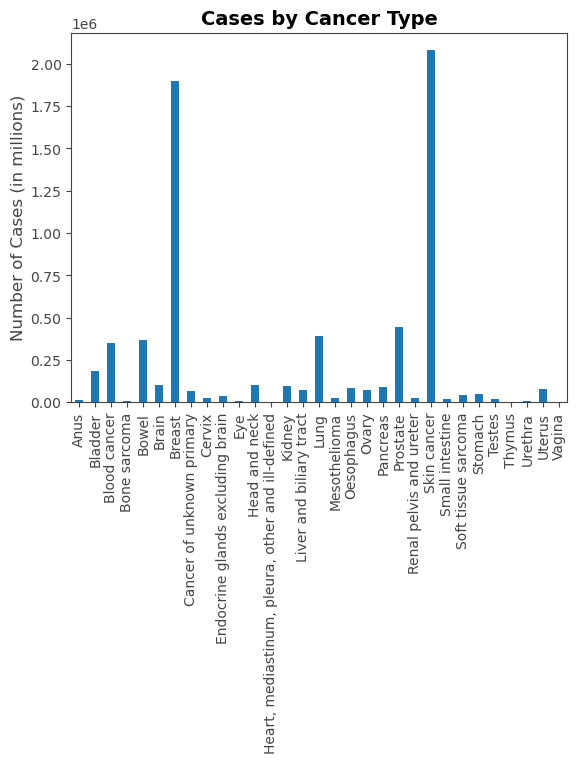

In [68]:
cases.plot(kind="bar")
plt.title("Cases by Cancer Type")
plt.ylabel("Number of Cases (in millions)")
plt.xlabel("") 
plt.show()

## Trend in Total Cancer Cases (2013–2022)

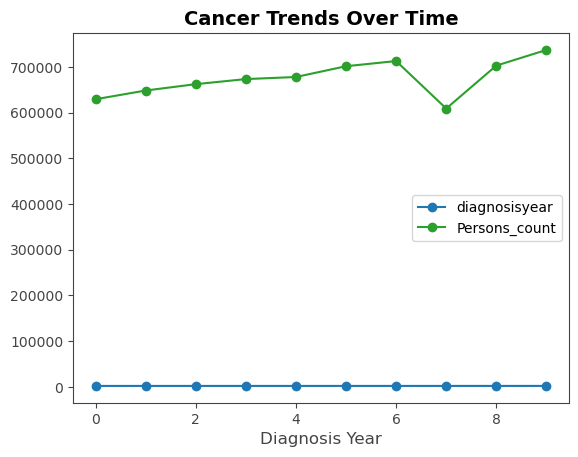

In [69]:
cases_by_year().plot(kind="line", marker="o")
plt.title("Cancer Trends Over Time")
plt.xlabel("Diagnosis Year") 
plt.show()

📊 Between 2013 and 2019, the number of cancer cases in England rose steadily from 629,043 in 2013 to 712,598 in 2019.

📊 In 2020, there was a sharp decline to 608,728 cases, likely reflecting the impact of the COVID-19 pandemic on cancer diagnoses and reporting.

📊 From 2021 onwards, cases rebounded, reaching 736,930 in 2022, the highest level in the decade.

📊 Overall, despite the dip in 2020, the long-term trend is upward, with cancer cases increasing by roughly 17% between 2013 and 2022.

## Total Cancer Cases by Gender

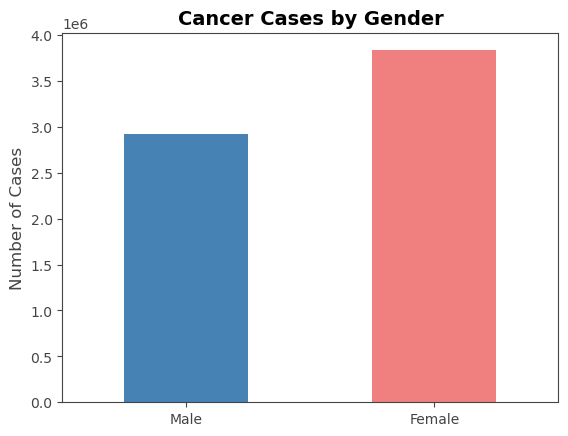

In [70]:
gender_cases = cases_by_gender()

gender_cases = gender_cases[gender_cases["Gender"] != "Persons"]

gender_cases.plot(kind='bar', x="Gender", y="Cases", color=['steelblue', 'lightcoral'], legend=False)
plt.title("Cancer Cases by Gender")
plt.xlabel("")
plt.xticks(rotation=360)
plt.ylabel("Number of Cases")
plt.show()

👩👨 Males account for 2,918,466 cases (43%), while females account for 3,833,736 cases (57%).

👥 The overall distribution shows a slightly higher cancer burden among females across the decade.

👥 Combined, there were 6,752,202 cancer cases recorded between 2013 and 2022.

## Cancer Cases by IMD Quintile (2013–2022)

In [71]:
cases_by_imd()

,imd_quintile,Persons_count
0,1 - most deprived,810654
1,2,928090
2,3,1102327
3,4,1204050
4,5 - least deprived,1276118


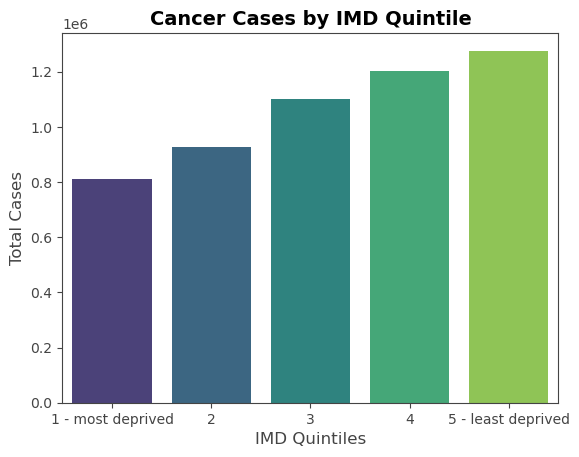

In [72]:
imd_cases = cases_by_imd()
sns.barplot(x='imd_quintile', y='Persons_count', data=imd_cases, hue='imd_quintile', palette="viridis", legend=False)
plt.title("Cancer Cases by IMD Quintile")
plt.xlabel("IMD Quintiles")
plt.ylabel("Total Cases")
plt.show()

📊 Most deprived areas (Quintile 1): 810,654 cases

📊 Least deprived areas (Quintile 5): 1,276,118 cases

📊 There is a clear gradient: cancer cases rise steadily from the most deprived to the least deprived groups.

📊 The least deprived quintile recorded roughly 57% more cases than the most deprived.

📊 This pattern may partly reflect population distribution, with larger populations in less deprived areas contributing to higher case counts.

## Cancer Incidence Rates by IMD Quintile (per 100k population)

In [73]:
imd_rate = df_rate.groupby('imd_quintile')['rate'].mean().reset_index()
print(imd_rate)

         imd_quintile       rate
0   1 - most deprived  32.966774
1                   2  32.738710
2                   3  33.497742
3                   4  34.328065
4  5 - least deprived  35.191290


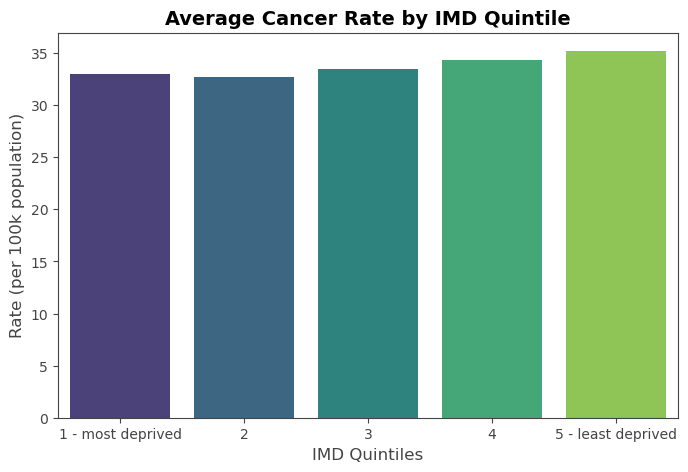

In [74]:
imd_rate = df_rate.groupby('imd_quintile')['rate'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='imd_quintile', y='rate', data=imd_rate, hue = 'imd_quintile', palette="viridis")
plt.title("Average Cancer Rate by IMD Quintile")
plt.xlabel("IMD Quintiles")
plt.ylabel("Rate (per 100k population)")
plt.show()

📊 Cancer rates gradually increase from the most deprived to the least deprived quintile.

📊 Most deprived areas (Quintile 1) have a rate of 32.97 per 100k, while least deprived areas (Quintile 5) have a rate of 35.19 per 100k.

📊 This indicates a slightly higher observed cancer incidence in less deprived populations, even after accounting for population size.

## Bivariate Analysis

## Breast Cancer Cases: Short-Term Trend (2018–2022)

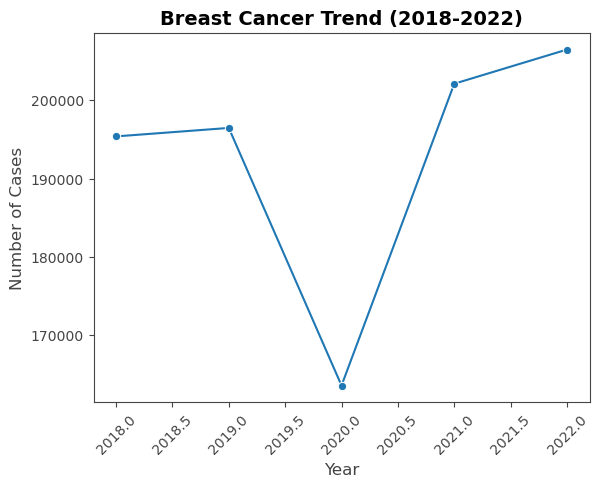

In [75]:
filtered_df = year_and_cancer(range(2018,2023), "Breast")
yearly_cases = filtered_df[['diagnosisyear', 'Persons_count']]
sns.lineplot(x='diagnosisyear', y='Persons_count', data=yearly_cases, marker="o")
plt.title("Breast Cancer Trend (2018-2022)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Number of Cases")
plt.show() 

✅ Between 2018 and 2022, breast cancer cases remained relatively stable overall, but a notable dip occurred in 2020, likely linked to the COVID-19 pandemic’s impact on screening and diagnosis. Cases rebounded strongly in 2021 and 2022, exceeding pre-pandemic levels.

## Cancer Cases by Gender (2018)

In [76]:
yearlycases_by_gender(2018)

,Gender,Cases
0,Male_count,306915
1,Female_count,394365
2,Persons_count,701280


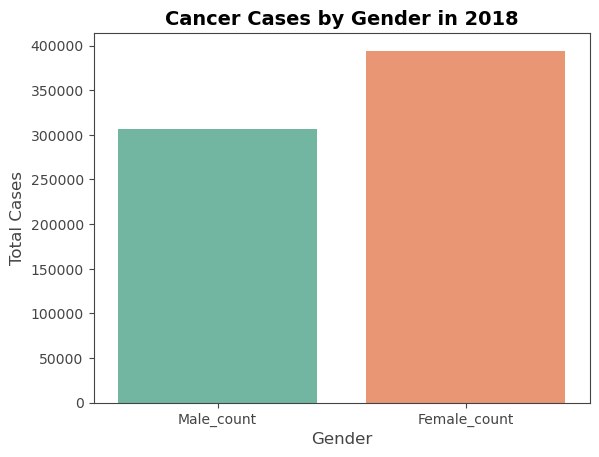

In [77]:
gender_cases = yearlycases_by_gender(2018)
gender_cases = gender_cases[gender_cases['Gender'] != "Persons_count"]
sns.barplot(x='Gender', y='Cases', data=gender_cases, hue='Gender', palette="Set2", legend=False)
plt.title("Cancer Cases by Gender in 2018")
plt.ylabel("Total Cases")
plt.xlabel("Gender")
plt.show()

✅ In 2018, females accounted for significantly more cancer cases (394,365) compared to males (306,915), representing roughly 29% higher incidence.

The Persons_count row represents the combined total of male and female cases (701,280). Since this value is already reflected in the gender-specific counts, it was excluded from the plot to avoid redundancy.

## Distribution of Cancer Cases by Type and Socioeconomic Deprivation (IMD Quintiles)

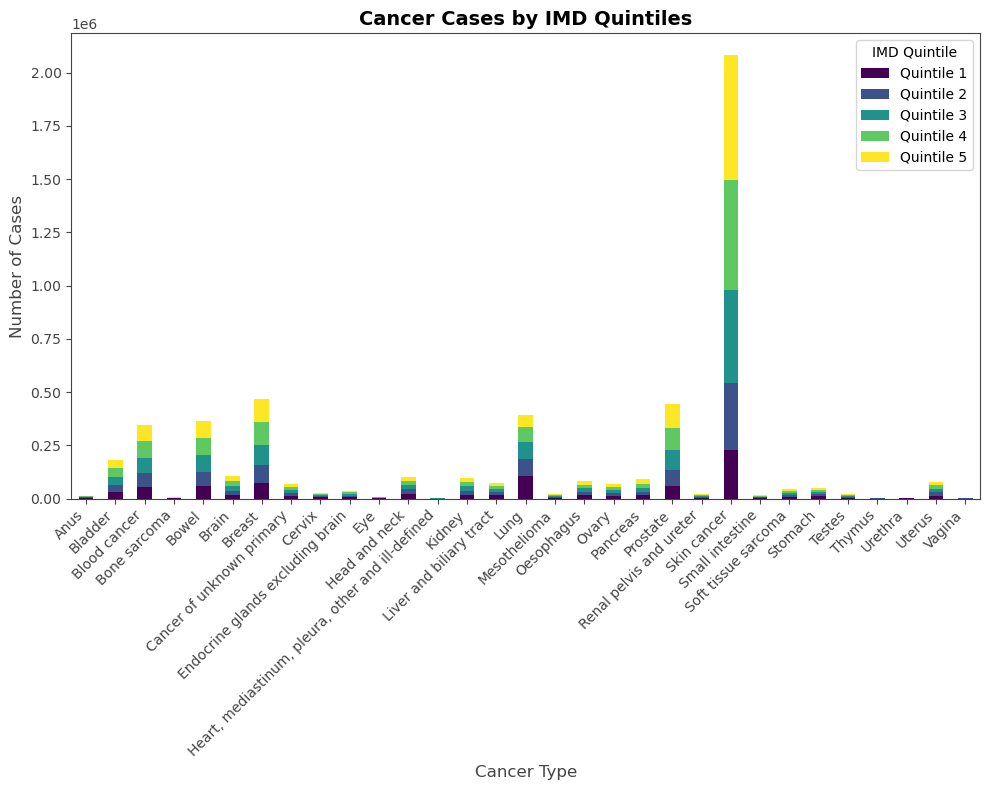

In [78]:
imd_cases = compare_quintiles()
imd_cases = imd_cases.set_index('Cancer Type')
imd_cases.plot(kind='bar', stacked=True, figsize=(10, 8),  colormap="viridis")
plt.title("Cancer Cases by IMD Quintiles")
plt.ylabel("Number of Cases")
plt.xlabel("Cancer Type")
plt.xticks(rotation=45, ha="right")
plt.legend(title="IMD Quintile")
plt.tight_layout()
plt.show()

✅ This chart compares cancer cases across socioeconomic deprivation quintiles. 

## Breast Cancer Cases by Stage at Diagnosis (2018)

In [79]:
cases_by_cancer_stage(2018, "Breast", gender="Persons_count")

,stage_at_diagnosis,Persons_count
0,Missing,5128
1,Stage 1 & 2,36699
2,Stage 3 & 4,6280
3,Unstageable,91


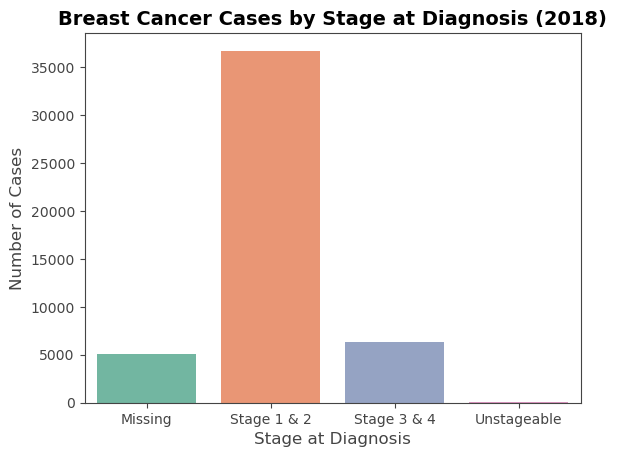

In [80]:
stage_cases = cases_by_cancer_stage(2018, "Breast", gender="Persons_count")

sns.barplot(x="stage_at_diagnosis", y="Persons_count", hue = 'stage_at_diagnosis', data=stage_cases, palette="Set2")
plt.title("Breast Cancer Cases by Stage at Diagnosis (2018)")
plt.xlabel("Stage at Diagnosis")
plt.ylabel("Number of Cases")
plt.show()

✅ Most breast cancer cases in 2018 were diagnosed at early stages (Stage 1 & 2: 36,699), while 6,280 were detected at advanced stages (Stage 3 & 4). A notable portion (5,128 cases) lacked stage information, and 91 were unstageable.

## Multivariate Analysis

## Skin Cancer Trend by Gender (2013–2022)

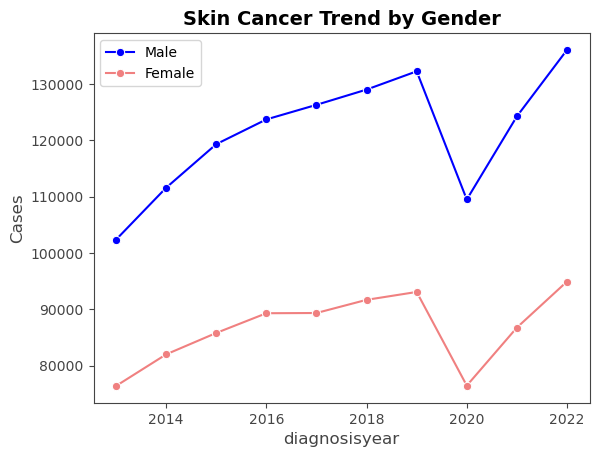

In [81]:
skin_cancer = df_summary[df_summary['ndrs_main_group'] == "Skin cancer"]

sns.lineplot(x='diagnosisyear', y='Male_count', data=skin_cancer, marker="o", label="Male", color ='blue')
sns.lineplot(x='diagnosisyear', y='Female_count', data=skin_cancer, marker="o", label="Female", color = 'lightcoral')

plt.title("Skin Cancer Trend by Gender")
plt.ylabel("Cases")
plt.show() 

✅ This chart shows the trend of skin cancer cases for males and females over time. Both genders follow a similar upward trajectory, though case numbers are consistently higher in males. 

## Gender-wise Distribution of Cancer Cases (2018)

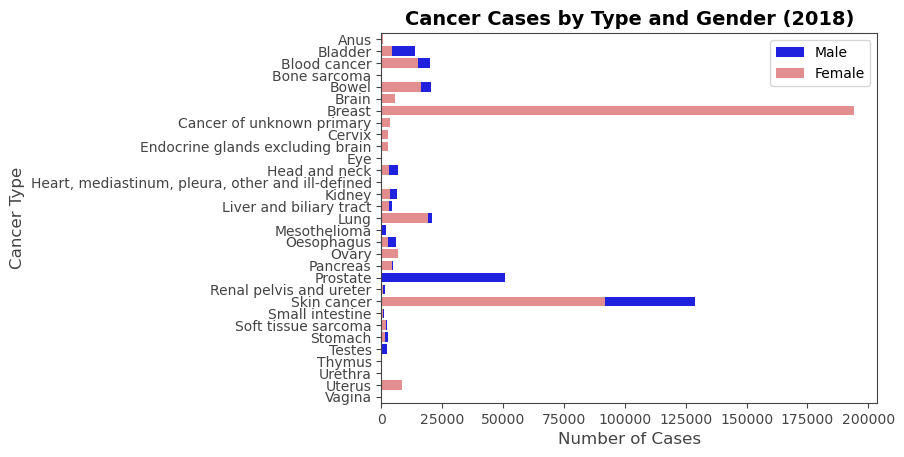

In [82]:
year = df_summary[df_summary['diagnosisyear'] == 2018].copy()
sns.barplot(y='ndrs_main_group', x='Male_count', data=year, color="blue", label="Male", errorbar=None)
sns.barplot(y='ndrs_main_group', x='Female_count', data=year, color="lightcoral", label="Female", errorbar=None)
plt.xlabel("Number of Cases")
plt.ylabel("Cancer Type")
plt.legend()
plt.title("Cancer Cases by Type and Gender (2018)")
plt.show() 

✅ In 2018, the highest cancer burden among men was Prostate Cancer with 50,669 cases, while among women, Breast Cancer dominated with 194,026 cases. Skin Cancer was more common in men (129,008 cases) than women (91,672 cases), reflecting the typical gender trend for this cancer type. Other cancers like Bowel, Lung, and Blood cancer showed substantial cases in both genders.

<h1 style="color:#2E86C1; font-family:'Segoe UI', Arial, sans-serif; font-weight:700; text-align:center; border-bottom:5px solid #2E86C1; padding-bottom:15px;">
🎨 Data Visualisation 🎨
</h1>


This section explores the overall trends in cancer, the distribution of cancer types, and patterns across gender, socioeconomic quintiles, and diagnosis stages. The goal is to provide a clear, visual story of how cancer incidence has evolved in England over the past decade.

## 📊 OVERALL TRENDS

<h3 style="color:#2E86C1; font-family:Arial; font-weight:bold;">
📈 Decade-Long Cancer Trends in England (2013–2022)
</h3>

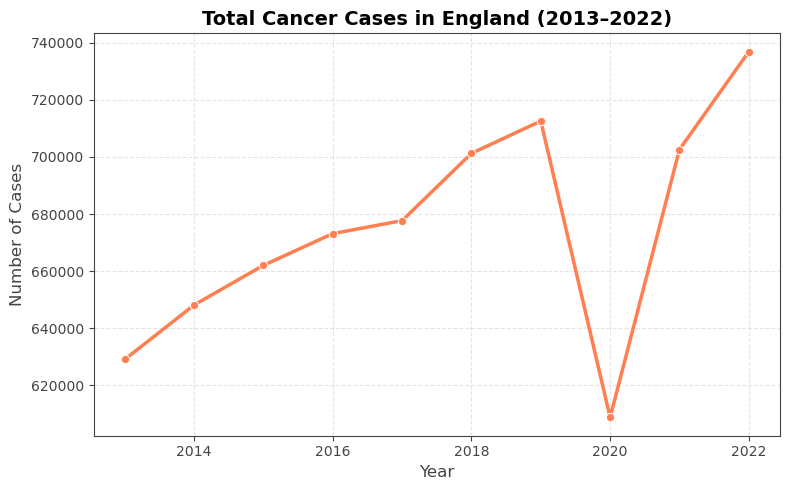

In [83]:
yearly_cases = cases_by_year()
yearly_cases = yearly_cases.reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(x='diagnosisyear', y='Persons_count', data=yearly_cases, marker="o", linewidth=2.5, color="coral")
plt.title("Total Cancer Cases in England (2013–2022)") 
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### 💡Cancer cases in England rose steadily over the decade, with a sharp dip in 2020 due to the pandemic, before rebounding to their highest level in 2022.

<h3 style="color:#2E86C1; font-family:Arial; font-weight:bold;">
🔍Cancer Distribution by Type
</h3>

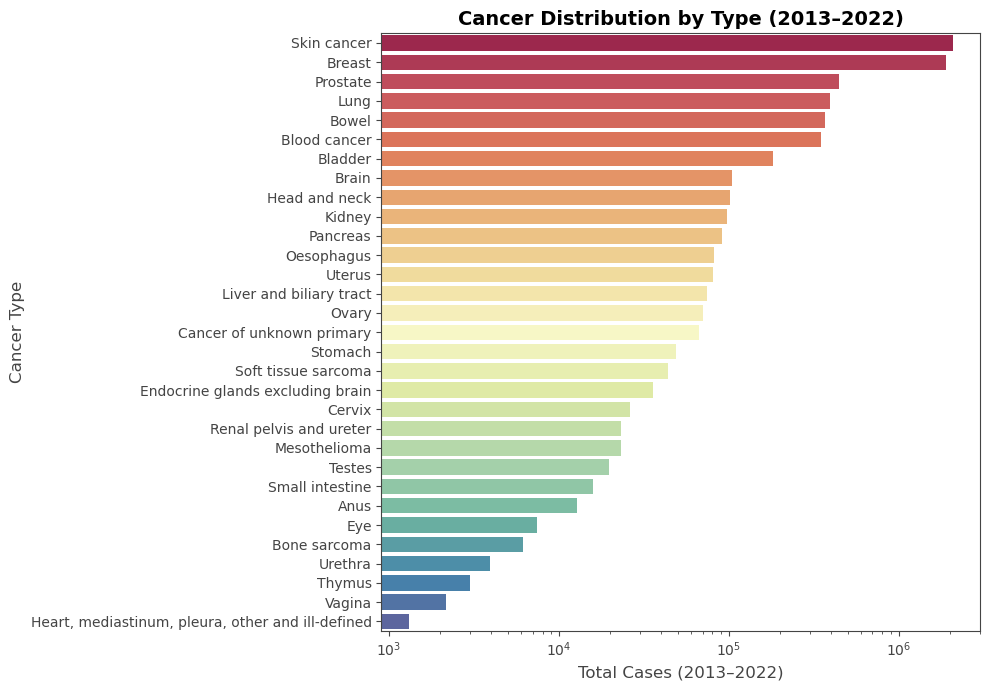

In [84]:
cancer_distribution = df_summary.groupby("ndrs_main_group")["Persons_count"].sum().reset_index().sort_values(by="Persons_count", ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(x="Persons_count", y="ndrs_main_group", data=cancer_distribution, hue="ndrs_main_group", palette="Spectral")
plt.xscale("log")
plt.title("Cancer Distribution by Type (2013–2022)")
plt.xlabel("Total Cases (2013–2022)")
plt.ylabel("Cancer Type")
plt.tight_layout()
plt.show()

### 📊 Skin cancer and breast cancer together account for over 50% of all cancer diagnoses in England during 2013–2022. In contrast, many cancers are rare, with fewer than 10,000 cases in the decade. This highlights the imbalance in cancer distribution, with resources and awareness likely concentrated on the most common types.

<hr style="border:2px solid #2E86C1;">


## 🚻 GENDER PATTERNS

<h3 style="color:#2E86C1; font-family:Arial; font-weight:bold;">
🔍Overall Gender Distribution
</h3>

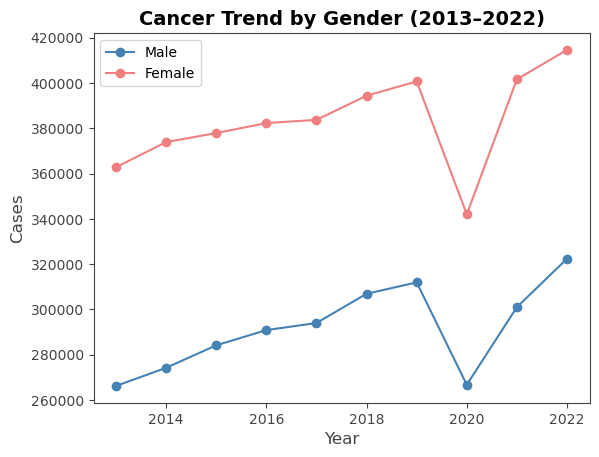

In [85]:
yearly_gender = df_summary.groupby('diagnosisyear')[['Male_count', 'Female_count']].sum().reset_index()

plt.plot(yearly_gender['diagnosisyear'], yearly_gender['Male_count'], marker="o", color="steelblue", label="Male")
plt.plot(yearly_gender['diagnosisyear'], yearly_gender['Female_count'], marker="o", color="lightcoral", label="Female")
plt.title("Cancer Trend by Gender (2013–2022)")
plt.xlabel("Year")
plt.ylabel("Cases")
plt.legend()
plt.show()

### 💡 From 2013 to 2022, cancer cases in England steadily increased for both genders, with females consistently having higher numbers. The 2020 dip highlights the pandemic’s impact on diagnoses, followed by a strong rebound in 2021–2022. Interestingly, male cases grew slightly faster over the decade, subtly narrowing the gender gap.

In [86]:
import squarify

<h3 style="color:#2E86C1; font-family:Arial; font-weight:bold;">
🧑‍🤝‍👩 Gender-Specific Burden: Top 5 Cancers in Men and Women
</h3>

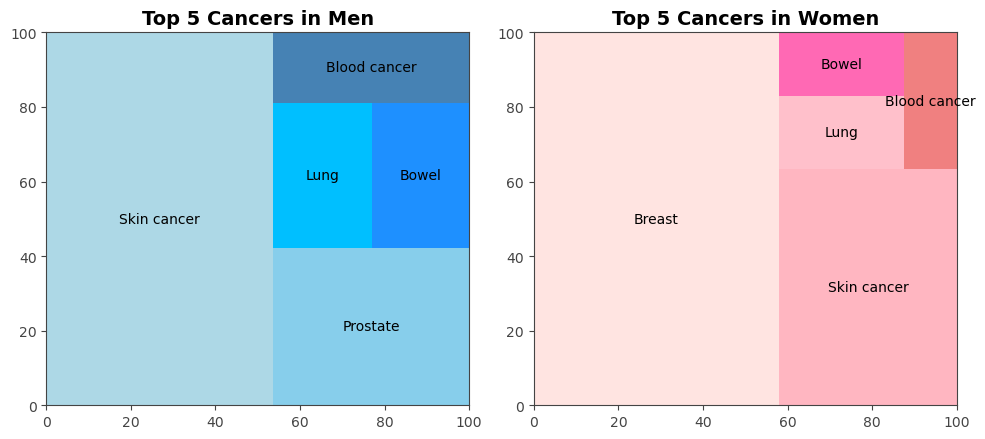

In [87]:
male_data = df_summary.groupby('ndrs_main_group')['Male_count'].sum().nlargest(5).reset_index()
female_data = df_summary.groupby('ndrs_main_group')['Female_count'].sum().nlargest(5).reset_index()

plt.figure(figsize=(10,4.5))

plt.subplot(1,2,1)
squarify.plot(sizes=male_data['Male_count'], label=male_data['ndrs_main_group'],color=["lightblue", "skyblue", "deepskyblue", "dodgerblue", "steelblue"])
plt.title("Top 5 Cancers in Men")

plt.subplot(1,2,2)
squarify.plot(sizes=female_data['Female_count'], label=female_data['ndrs_main_group'],color=["mistyrose", "lightpink", "pink", "hotpink", "lightcoral"])
plt.title("Top 5 Cancers in Women")

plt.tight_layout()
plt.show() 

### 💡**For men, skin cancer accounts for the largest share, far exceeding prostate, lung, bowel, and blood cancers. Among women, breast and skin cancers dominate at similar levels, followed by lung, bowel, and blood cancers. This highlights distinct gender patterns, with prostate standing out in men and breast in women.**

<hr style="border:2px solid #2E86C1;">

## 🏙️ SOCIOECONOMIC INSIGHTS

<h3 style="color:#2E86C1; font-family:Arial; font-weight:bold;">
📈Cancer Cases by IMD Quintiles
</h3>

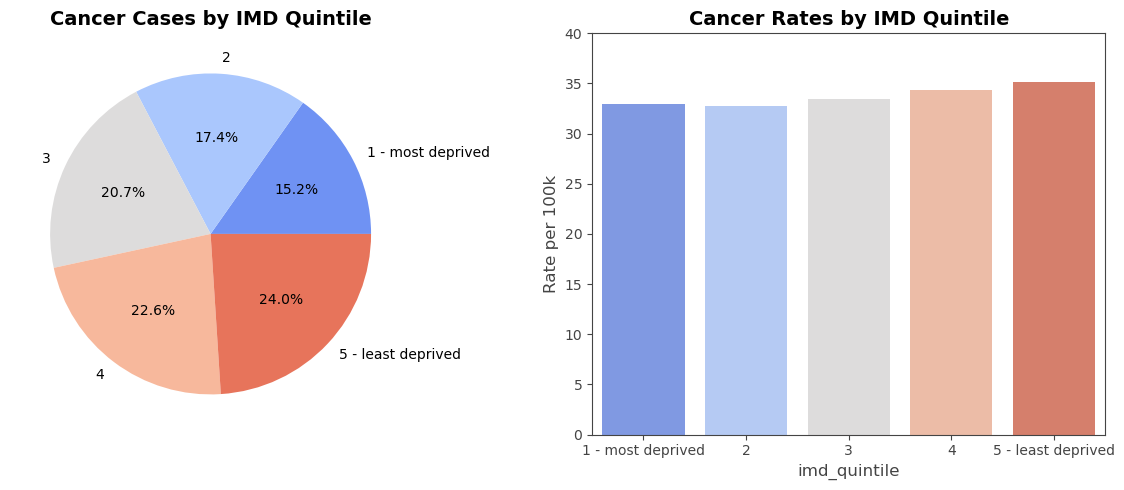

In [88]:
plt.figure(figsize=(12,5))
imd_cases = cases_by_imd()
plt.subplot(1, 2, 1)
plt.pie(imd_cases['Persons_count'], labels=imd_cases['imd_quintile'],autopct='%1.1f%%',colors=sns.color_palette("coolwarm", 5))
plt.title("Cancer Cases by IMD Quintile")

imd_rate = df_rate.groupby('imd_quintile')['rate'].mean().reset_index()
plt.subplot(1, 2, 2)
sns.barplot(x='imd_quintile', y='rate', data=imd_rate, hue='imd_quintile',palette="coolwarm")
plt.title("Cancer Rates by IMD Quintile")
plt.ylabel("Rate per 100k")
plt.ylim(0, 40)

plt.tight_layout()
plt.show()

### 💡**Cancer cases appear higher in less deprived areas, but when adjusted for population size, incidence rates are very similar across quintiles. This suggests the gradient in raw case counts mainly reflects population distribution, not deprivation-related risk.**

<h3 style="color:#2E86C1; font-family:Arial; font-weight:bold;">
📈Socioeconomic Divide in Cancer Burden: Distribution Across IMD Quintiles
</h3>

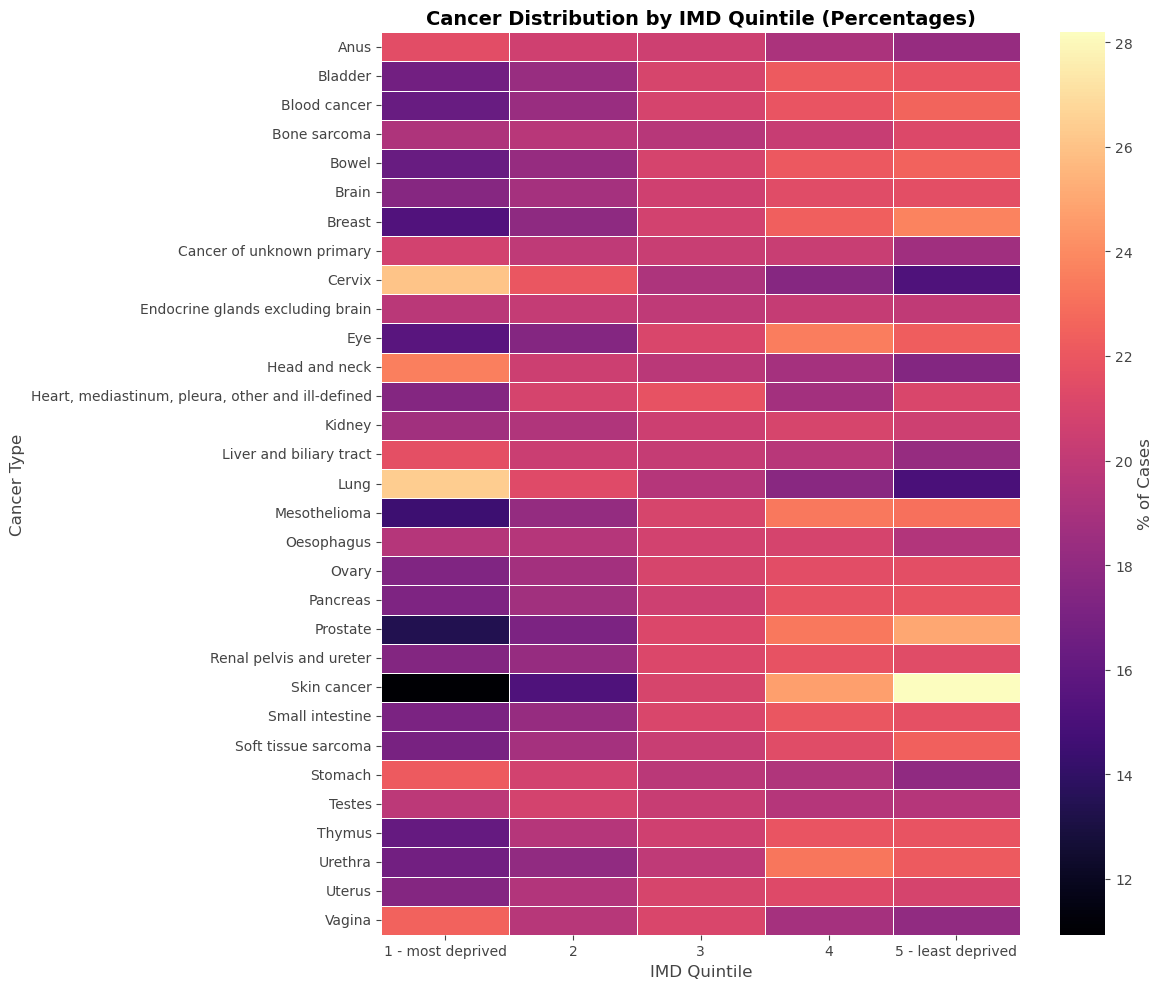

In [89]:
imd_cases = df_imd_summary.groupby(["ndrs_main_group", "imd_quintile"])["Persons_count"].sum().reset_index()
imd_cases_pivot = imd_cases.pivot(index="ndrs_main_group", columns="imd_quintile", values="Persons_count")
imd_cases_pct = imd_cases_pivot.div(imd_cases_pivot.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 10))
sns.heatmap(imd_cases_pct, cmap="magma", annot=False, linewidths=0.5, linecolor="white",cbar_kws={'label': '% of Cases'})
plt.title("Cancer Distribution by IMD Quintile (Percentages)")
plt.xlabel("IMD Quintile")
plt.ylabel("Cancer Type")
plt.tight_layout()
plt.show() 

### 💡**Skin cancer is lowest in the most deprived quintile and highest in the least deprived. Lung and cervical cancers show the opposite trend, being most common in the most deprived group. The heatmap highlights clear differences in cancer distribution across socioeconomic quintiles.**

<h3 style="color:#2E86C1; font-family:Arial; font-weight:bold;">
📈Trends Over Time by IMD Quintile 
</h3>

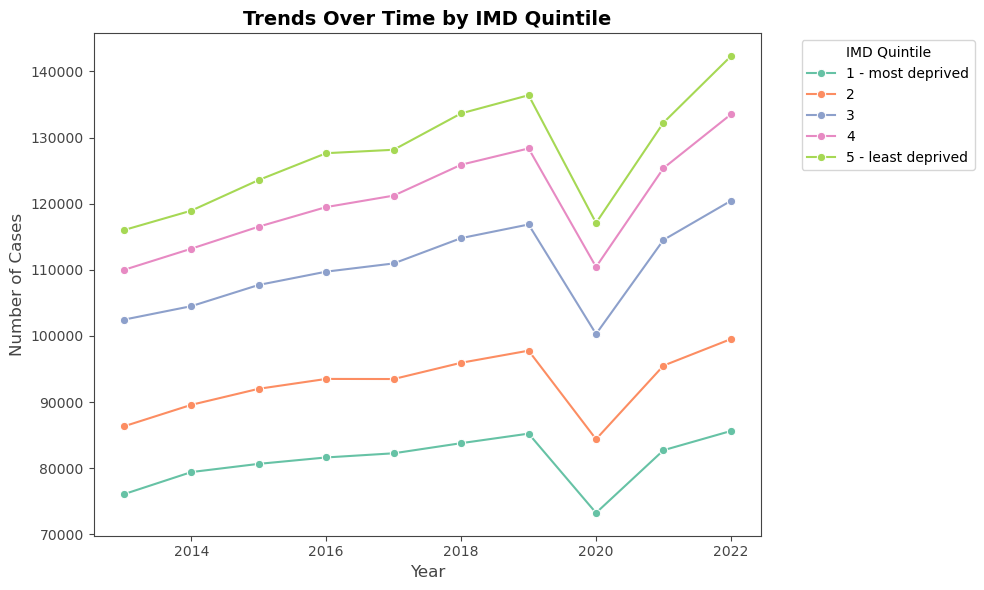

In [90]:
imd_trends = df_imd_summary.groupby(["diagnosisyear", "imd_quintile"])["Persons_count"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=imd_trends, x="diagnosisyear", y="Persons_count", hue="imd_quintile", marker="o", palette="Set2")
plt.title("Trends Over Time by IMD Quintile")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend(title="IMD Quintile", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show() 

### 💡**From 2013 to 2022, cancer case counts are consistently higher in less deprived areas and lowest in the most deprived. However, this pattern reflects differences in population size across quintiles rather than deprivation-related risk, as incidence rates remain broadly similar once adjusted for population.**

<hr style="border:2px solid #2E86C1;">

## 🧬 CANCER CASES BY STAGE AT DIAGNOSIS

<h3 style="color:#2E86C1; font-family:Arial; font-weight:bold;">
🎭 Overall distribution
</h3>

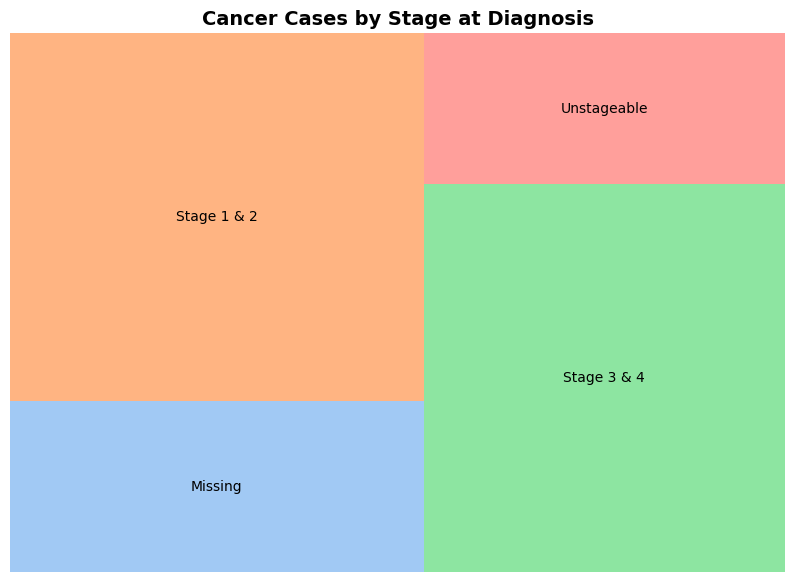

In [91]:
stage_cases = df_stage[df_stage['diagnosisyear'].isin(range(2013, 2023))].groupby("stage_at_diagnosis")["Persons_count"].sum().reset_index()
plt.figure(figsize=(10,7))
squarify.plot(sizes=stage_cases["Persons_count"], label=stage_cases["stage_at_diagnosis"], color=sns.color_palette("pastel"))
plt.title("Cancer Cases by Stage at Diagnosis")
plt.axis("off")
plt.show()

### 💡**Most cancers are diagnosed at either early (Stage 1 & 2) or advanced stages (Stage 3 & 4). A smaller share are classed as ‘unstageable’, where the stage is difficult to determine, and some records have missing stage information, highlighting gaps in staging data.** 

<h3 style="color:#2E86C1; font-family:Arial; font-weight:bold;">
🎭Stage Patterns at Diagnosis: Breast vs. Prostate Cancer
</h3>

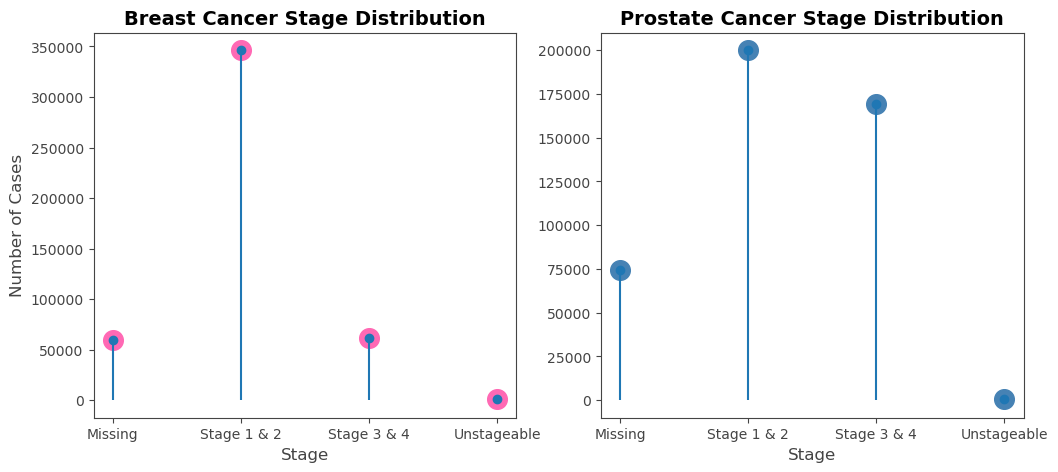

In [92]:
breast_stage = df_stage[df_stage['ndrs_main_group'] == "Breast"]
breast_stage = breast_stage.groupby('stage_at_diagnosis')['Persons_count'].sum().reset_index()

prostate_stage = df_stage[df_stage['ndrs_main_group'] == "Prostate"]
prostate_stage = prostate_stage.groupby('stage_at_diagnosis')['Persons_count'].sum().reset_index()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.stem(breast_stage['stage_at_diagnosis'], breast_stage['Persons_count'], basefmt=" ")
plt.scatter(breast_stage['stage_at_diagnosis'], breast_stage['Persons_count'], s=200, color="#FF69B4")
plt.title("Breast Cancer Stage Distribution")
plt.xlabel("Stage")
plt.ylabel("Number of Cases")


plt.subplot(1,2,2)
plt.stem(prostate_stage['stage_at_diagnosis'], prostate_stage['Persons_count'], basefmt=" ")
plt.scatter(prostate_stage['stage_at_diagnosis'], prostate_stage['Persons_count'], s=200, color="#4682B4")
plt.title("Prostate Cancer Stage Distribution")
plt.xlabel("Stage")
plt.ylabel("")

plt.show()

### **💡For breast cancer, most cases are diagnosed at early stages (Stage 1 & 2), with advanced stages (Stage 3 & 4) and unstageable cases forming a small fraction. In contrast, prostate cancer shows a more even distribution, with substantial numbers of cases in both early (Stage 1 & 2) and advanced stages (Stage 3 & 4). Missing stage information is higher for prostate cancer, highlighting gaps in documentation.**

<hr style="border:2px solid #2E86C1;">

## 📊 MAJOR CANCER TRENDS

<h3 style="color:#2E86C1; font-family:Arial; font-weight:bold;">
⏳Decade-long Trends in Common Cancer Types
</h3>

In [93]:
yearly_totals = df_summary.groupby(['diagnosisyear', 'ndrs_main_group'])['Persons_count'].sum().reset_index()
top5_cancers = yearly_totals.groupby('ndrs_main_group')['Persons_count'].sum().nlargest(5).index
top5_yearly = yearly_totals[yearly_totals['ndrs_main_group'].isin(top5_cancers)]

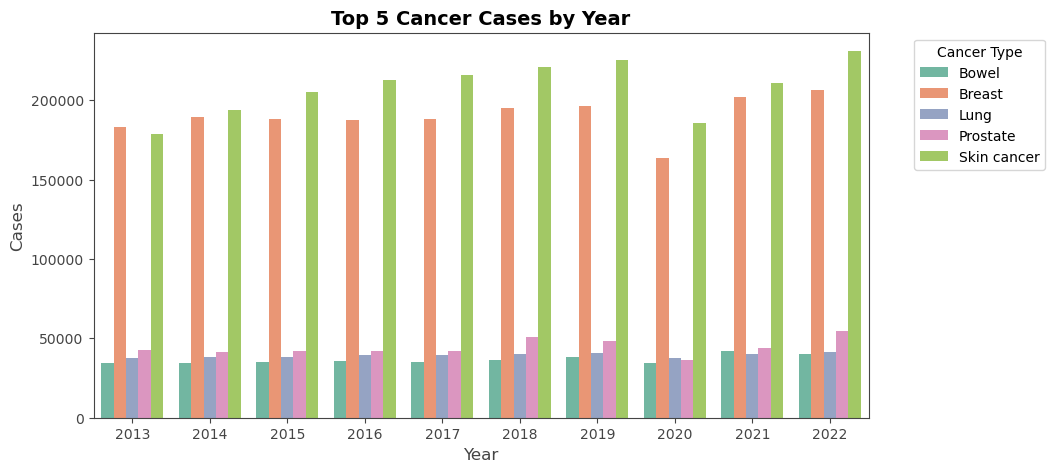

In [94]:
plt.figure(figsize=(10,5))
sns.barplot(x='diagnosisyear', y='Persons_count', hue='ndrs_main_group', data=top5_yearly, palette="Set2")
plt.title("Top 5 Cancer Cases by Year")
plt.xlabel("Year")
plt.ylabel("Cases")
plt.legend(title="Cancer Type", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

### 💡**Between 2013 and 2022, skin cancer consistently accounted for the highest number of diagnoses, with a steady upward trend despite a dip in 2020. Breast cancer remained the second most common and showed gradual growth over the decade. In contrast, prostate, bowel, and lung cancers maintained relatively stable levels, with lung cancer cases showing only modest increases. Together, the plot highlights both the dominance of skin cancer and the relative stability of other major cancers over time.**

<h3 style="color:#2E86C1; font-family:Arial; font-weight:bold;">
⏳Growth Trends in Common Cancers Over the Decade
</h3>

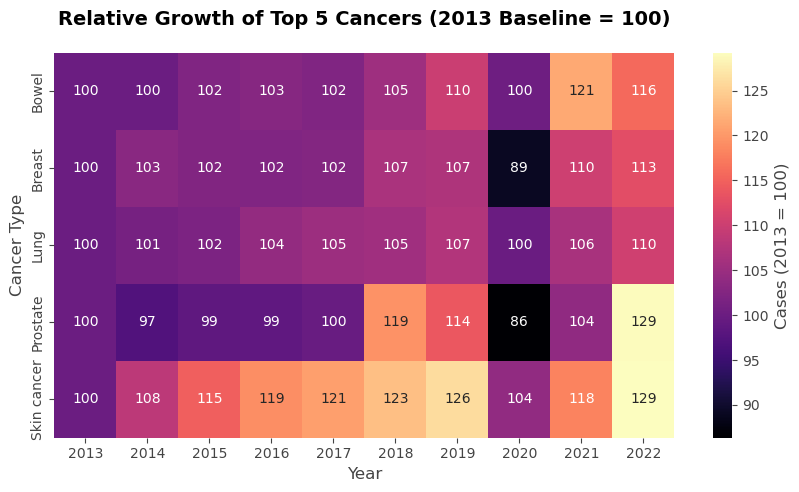

In [95]:
cases_pivot = top5_yearly.pivot(index='diagnosisyear', columns='ndrs_main_group', values='Persons_count')
growth = cases_pivot.div(cases_pivot.iloc[0]) * 100

plt.figure(figsize=(10,5))
sns.heatmap(growth.T, cmap="magma", annot=True, fmt=".0f", cbar_kws={'label': 'Cases (2013 = 100)'})
plt.title("Relative Growth of Top 5 Cancers (2013 Baseline = 100)", pad=20)
plt.xlabel("Year")
plt.ylabel("Cancer Type")
plt.show()

### 💡**Since 2013, Skin cancer consistently had the highest number of cases, growing from around 179k to 231k by 2022. Prostate cancer, although much lower in absolute numbers, increased at a similar relative rate (~29% from 2013 baseline). Breast and Bowel cancers showed steady increases, while Lung cancer grew moderately.**

<h3 style="color:#2E86C1; font-family:Arial; font-weight:bold;">
☀️Tracing a Decade of Skin Cancer: Rising Cases and Gender Patterns
</h3>

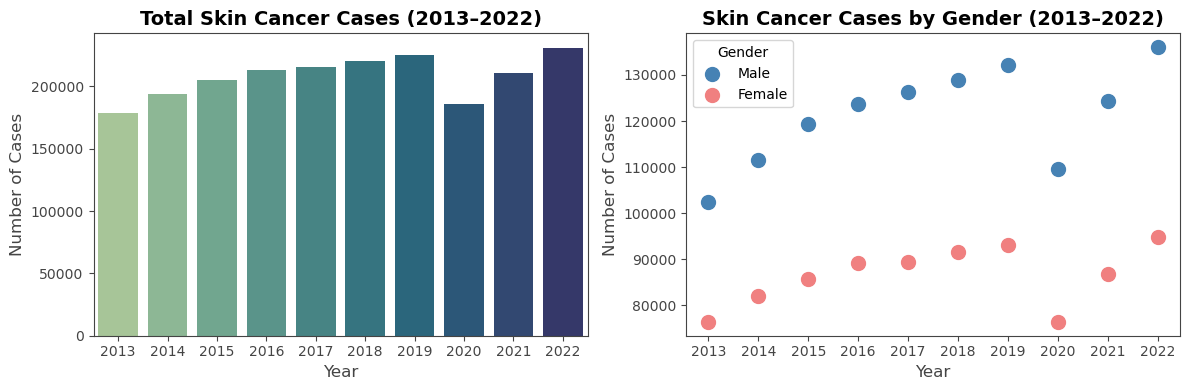

In [96]:
yearly_cases_all = cases_by_year('Skin cancer')
yearly_cases_all_df = yearly_cases_all.reset_index()

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
sns.barplot(x='diagnosisyear',y='Persons_count',data=yearly_cases_all_df,hue='diagnosisyear',palette="crest",legend=False)
plt.title("Total Skin Cancer Cases (2013–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Cases")

skin_gender_df = df_summary[df_summary['ndrs_main_group'] == 'Skin cancer']
skin_gender_df = skin_gender_df.groupby(['diagnosisyear']).agg({'Male_count':'sum', 'Female_count':'sum'}).reset_index()

plt.subplot(1, 2, 2)
plt.scatter(skin_gender_df['diagnosisyear'], skin_gender_df['Male_count'], color='steelblue', s=100, label='Male')
plt.scatter(skin_gender_df['diagnosisyear'], skin_gender_df['Female_count'], color='lightcoral', s=100, label='Female')
plt.title("Skin Cancer Cases by Gender (2013–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.xticks(skin_gender_df['diagnosisyear'])
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

### 💡**Skin cancer cases have consistently been higher among men than women across the decade. Both genders show a steady upward trend, though there was a dip in 2020, likely reflecting pandemic-related disruptions in diagnoses.**

<h3 style="color:#2E86C1; font-family:Arial; font-weight:bold;">
🚻Gender Patterns in Top 5 Cancers
</h3>

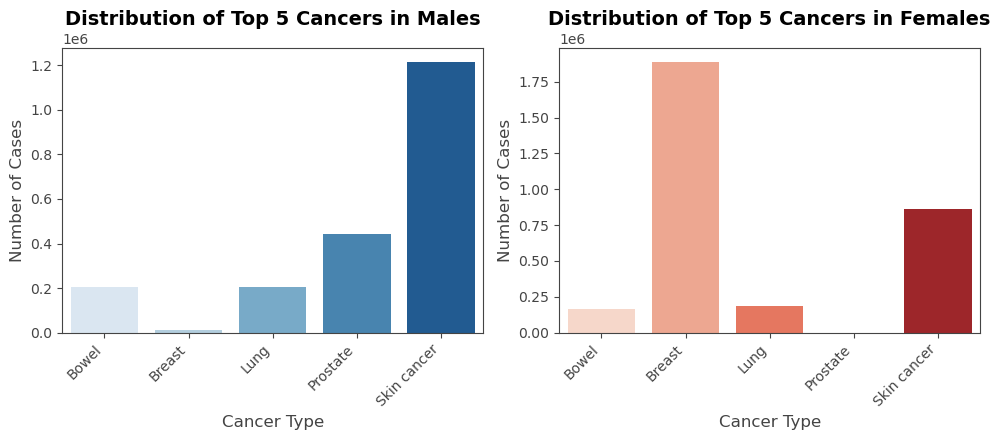

In [97]:
df_summary['Total_cases'] = df_summary['Male_count'] + df_summary['Female_count']
top5_cancers = df_summary.groupby("ndrs_main_group")["Total_cases"].sum().nlargest(5).index
top_5 = df_summary[df_summary['ndrs_main_group'].isin(top5_cancers)]
top_5_grouped = top_5.groupby("ndrs_main_group")[["Male_count","Female_count"]].sum().reset_index()

plt.figure(figsize=(10,4.5))

plt.subplot(1, 2, 1)
sns.barplot(x="ndrs_main_group", y="Male_count", data=top_5_grouped,hue="ndrs_main_group", palette="Blues")
plt.title("Distribution of Top 5 Cancers in Males")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Cancer Type")
plt.ylabel("Number of Cases")

plt.subplot(1, 2, 2)
sns.barplot(x="ndrs_main_group", y="Female_count", data=top_5_grouped, hue="ndrs_main_group",palette="Reds")
plt.title("Distribution of Top 5 Cancers in Females")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Cancer Type")
plt.ylabel("Number of Cases")

plt.tight_layout()
plt.show()

### 💡**Among men, skin cancer emerges as the most significant concern, whereas breast cancer clearly dominates the landscape for women. Other cancers such as lung, bowel, and blood cancers appear more evenly distributed, though men tend to be affected slightly more.**

<hr style="border:2px solid #2E86C1;">

## 📌 Conclusion

Over the last decade, cancer cases in England have generally increased, with a small dip in 2020 likely due to COVID-19 disruptions. Skin and breast cancers remain the most common, followed by lung, bowel, and blood cancers.

Gender differences are evident. Women consistently have higher case counts, although men’s cases have grown slightly faster, narrowing the gap. Skin cancer dominates in men, while breast and skin cancers lead in women, with other major cancers showing only minor gender differences.

Socioeconomic patterns reveal that higher raw case counts in less deprived areas largely reflect population size rather than true risk. Although lung and cervical cancers are more common in deprived areas, skin cancer is higher in less deprived populations.

Most cancers are diagnosed at early stages, especially among women, while prostate cancer shows broader stage variation. Gaps in staging data, particularly for prostate cancer, highlight opportunities for improving documentation and early detection.

To conclude, skin cancer has grown the fastest over the decade, followed by breast and bowel cancers, while other major cancers remain relatively stable. The 2020 dip reflects the pandemic’s impact, but the rapid rebound underscores the resilience of cancer detection and monitoring. These trends emphasize the importance of targeted awareness, screening, and resource planning across genders and socioeconomic groups.

<hr style="border: 2px solid #2E86C1; margin-top:20px; margin-bottom:20px;">